# SFH of UV red galaxies
In `uv_red.ipynb` I examined the SEDs and properties of simulated galaxies that are intrinsically very UV red (FUV - NUV > 2.5). In this notebook, I will examine their SFHs and answer the following questions: 
1. Do UV red galaxies have different SFHs than quiescent galaxies with comparable $M_*$ and ${\rm SFR}$? 
2. Do the UV red/quiescent galaxies in SIMBA differ from the UV red/quiescent galaxies in TNG or EAGLE? 

In [1]:
import os 
import sys 
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
t_sfh_low, t_sfh_high = np.loadtxt('/Users/chahah/data/galpopfm/sed/simba/t_sfh.txt', unpack=True, delimiter=',', usecols=[0, 1])

In [4]:
sfh_simba = h5py.File('/Users/chahah/data/galpopfm/sed/simba/simba.sfh.m100n1024_s151_z0.00.hdf5', 'r')
sed_simba = dustInfer._read_sed('simba') 

In [59]:
sfr0_simba = sfh_simba['SFR'][...] == 0.
logsfr_simba = np.log10(sfh_simba['SFR'][...])
logsfr_simba[sfr0_simba] = -6
logssfr_simba = logsfr_simba - sed_simba['logmstar']

FUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_fuv') 
NUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_nuv')
R_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='r_sdss')

In [60]:
cuts = (R_simba < -20) & (FUV_simba < -13.5) & (NUV_simba < -14.0)

(-20.0, -24.0)

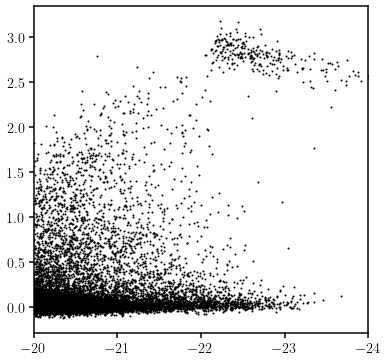

In [61]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(R_simba[cuts], (FUV_simba - NUV_simba)[cuts], c='k', s=1)
sub.set_xlim(-20., -24)

In [62]:
uv_red = (cuts & ((FUV_simba - NUV_simba) > 2.)) | (cuts & sfr0_simba)
uv_lessred = cuts & ((FUV_simba - NUV_simba) > 1.) & ~uv_red
uv_lesserred = cuts & ((FUV_simba - NUV_simba) > 0.5) & ~uv_red & ~uv_lessred

(-6.2, 2.0)

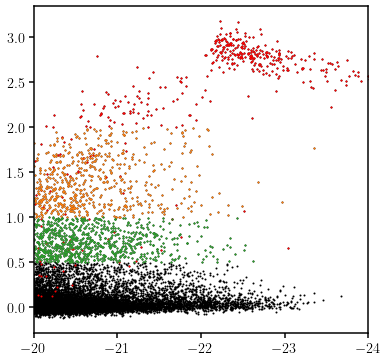

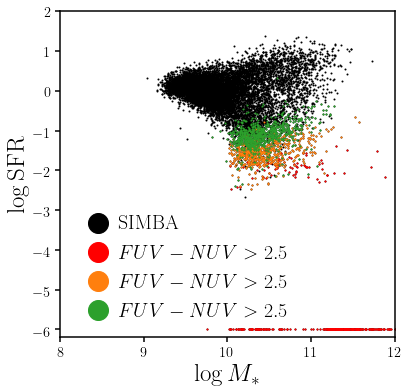

In [63]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(R_simba[cuts], (FUV_simba - NUV_simba)[cuts], c='k', s=1)
sub.scatter(R_simba[uv_red], (FUV_simba - NUV_simba)[uv_red], c='r', s=1)
sub.scatter(R_simba[uv_lessred], (FUV_simba - NUV_simba)[uv_lessred], c='C1', s=1)
sub.scatter(R_simba[uv_lesserred], (FUV_simba - NUV_simba)[uv_lesserred], c='C2', s=1)
sub.set_xlim(-20., -24)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'][cuts], logsfr_simba[cuts], c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][uv_red], logsfr_simba[uv_red], c='r', s=1, label='$FUV-NUV > 2.5$')
sub.scatter(sed_simba['logmstar'][uv_lessred], logsfr_simba[uv_lessred], c='C1', s=1, label='$FUV-NUV > 2.5$')
sub.scatter(sed_simba['logmstar'][uv_lesserred], logsfr_simba[uv_lesserred], c='C2', s=1, label='$FUV-NUV > 2.5$')

sub.legend(loc='lower left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 2)

In [64]:
sfh_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1)
sfr_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1) / (t_sfh_high - t_sfh_low) / 1e9

(-6.2, 2.0)

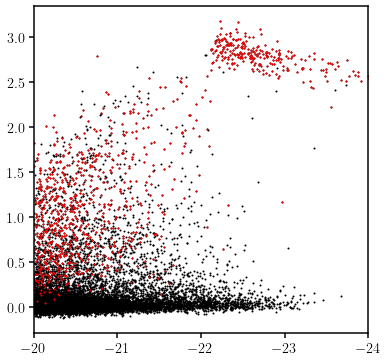

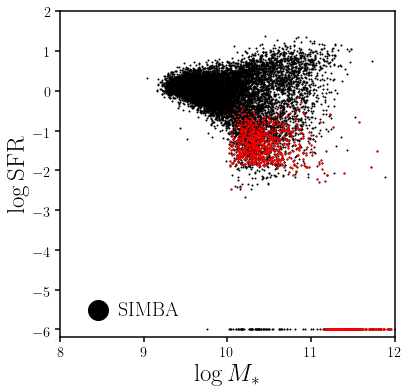

In [88]:
no_recent_sf = cuts & (np.sum(sfh_t_simba[:,:18], axis=1) == 0.)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(R_simba[cuts], (FUV_simba - NUV_simba)[cuts], c='k', s=1)
sub.scatter(R_simba[no_recent_sf], (FUV_simba - NUV_simba)[no_recent_sf], c='r', s=1)
sub.set_xlim(-20., -24)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'][cuts], logsfr_simba[cuts], c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][no_recent_sf], logsfr_simba[no_recent_sf], c='r', s=1)

sub.legend(loc='lower left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 2)

Text(0.5, 0, '$t_{\\rm lookback}$')

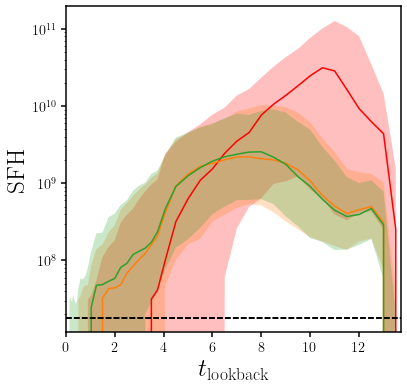

In [95]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red, uv_lessred, uv_lesserred], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfh_t_simba[sample,:], [0.16, 0.50, 0.84], axis=0)

    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
    sub.axhline(1.82e7, color='k', linestyle='--')
sub.set_xlim(0, 13.7)
sub.set_yscale('log')
sub.set_ylabel('SFH', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

10.912991930125898
11.166748962706842


Text(0.5, 0, '$t_{\\rm lookback}$')

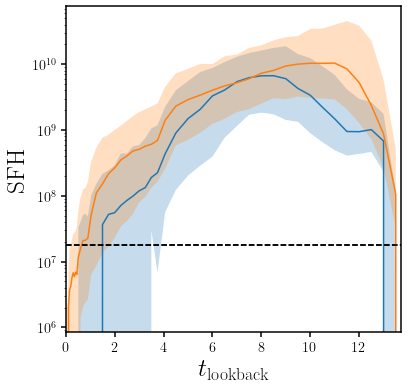

In [134]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sample = uv_lessred & (sed_simba['logmstar'] > 10.5)
clr='C0'
print(np.log10(np.median(np.sum(sfh_t_simba[sample,:], axis=1))))
sfh_t_sample = np.quantile(sfh_t_simba[sample,:], [0.16, 0.50, 0.84], axis=0)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.axhline(1.82e7, color='k', linestyle='--')

sample = uv_lessred_tng
print(np.log10(np.median(np.sum(sfh_t_tng[sample,:], axis=1))))
sfh_t_sample = np.quantile(sfh_t_tng[sample,:], [0.16, 0.50, 0.84], axis=0)

clr='C1'
sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.axhline(1.82e7, color='k', linestyle='--')


sub.set_xlim(0, 13.7)
sub.set_yscale('log')
sub.set_ylabel('SFH', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

In [137]:
np.log10(1.82e7/1e8)

-0.7399286120149252

Text(0.5, 0, '$t_{\\rm lookback}$')

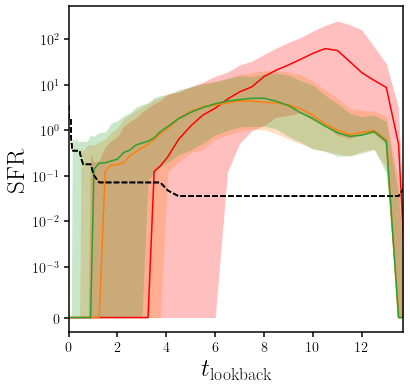

In [117]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red, uv_lessred, uv_lesserred], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfr_t_simba[sample,:], [0.16, 0.50, 0.84], axis=0)
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), 1.8e7/(t_sfh_high-t_sfh_low)/1e9, c='k', ls='--')
sub.set_xlim(0, 13.7)
sub.set_yscale('symlog', linthreshy=1e-3)
#sub.set_ylim(0, None)
sub.set_ylabel('SFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)


Text(0.5, 0, '$t_{\\rm lookback}$')

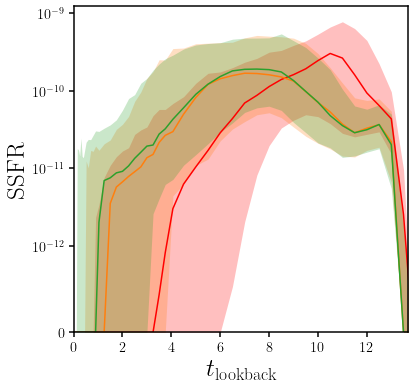

In [74]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red, uv_lessred, uv_lesserred], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfr_t_simba[sample,:]/(10**sed_simba['logmstar'])[sample,None], [0.16, 0.50, 0.84], axis=0)
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_yscale('symlog', linthreshy=1e-12)
sub.set_ylim(0, None)
sub.set_ylabel('SSFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

In [69]:
sed_tng = dustInfer._read_sed('tng') 
sfh_tng = h5py.File('/Users/chahah/data/galpopfm/sed/tng/IQ_TNG_SFRHs-corrected.hdf5', 'r')

In [26]:
sfr0_tng = sed_tng['logsfr.inst'] == -999
logsfr_tng = sed_tng['logsfr.inst']
logsfr_tng[sfr0_tng] = -6
logssfr_tng = logsfr_tng - sed_tng['logmstar']

FUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_fuv') 
NUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_nuv')
R_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='r_sdss')
G_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='g_sdss')

In [27]:
cuts_tng = (R_tng < -20) & (FUV_tng < -13.5) & (NUV_tng < -14.0)

In [29]:
uv_red_tng = cuts_tng & ((FUV_tng - NUV_tng) > 2.5)
uv_lessred_tng = cuts_tng & ((FUV_tng - NUV_tng) > 1.) & ~uv_red_tng
uv_lesserred_tng = cuts_tng & ((FUV_tng - NUV_tng) > 0.5) & ~uv_red_tng & ~uv_lessred_tng

Text(0, 0.5, '$\\log {\\rm SFR}$')

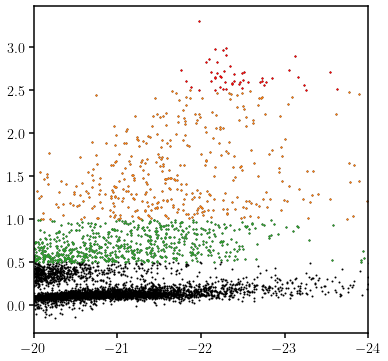

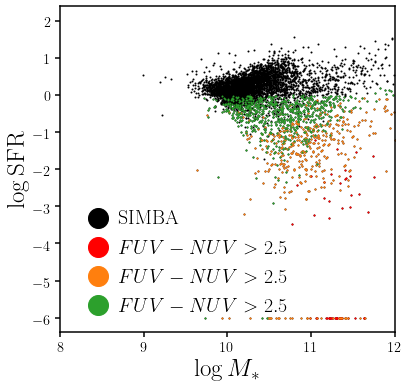

In [133]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(R_tng[cuts_tng], (FUV_tng - NUV_tng)[cuts_tng], c='k', s=1)
sub.scatter(R_tng[uv_red_tng], (FUV_tng - NUV_tng)[uv_red_tng], c='r', s=1)
sub.scatter(R_tng[uv_lessred_tng], (FUV_tng - NUV_tng)[uv_lessred_tng], c='C1', s=1)
sub.scatter(R_tng[uv_lesserred_tng], (FUV_tng - NUV_tng)[uv_lesserred_tng], c='C2', s=1)
sub.set_xlim(-20., -24)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_tng['logmstar'][cuts_tng], logsfr_tng[cuts_tng], c='k', s=1, label='SIMBA')
sub.scatter(sed_tng['logmstar'][uv_red_tng], logsfr_tng[uv_red_tng], c='r', s=1, label='$FUV-NUV > 2.5$')
sub.scatter(sed_tng['logmstar'][uv_lessred_tng], logsfr_tng[uv_lessred_tng], c='C1', s=1, label='$FUV-NUV > 2.5$')
sub.scatter(sed_tng['logmstar'][uv_lesserred_tng], logsfr_tng[uv_lesserred_tng], c='C2', s=1, label='$FUV-NUV > 2.5$')

sub.legend(loc='lower left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
#sub.set_ylim(-6.2, 2)

In [32]:
sfh_t_tng = np.sum(sfh_tng['SFRH'], axis=2) * (t_sfh_high - t_sfh_low) * 1e9
sfr_t_tng = np.sum(sfh_tng['SFRH'], axis=2) 

Text(0.5, 0, '$t_{\\rm lookback}$')

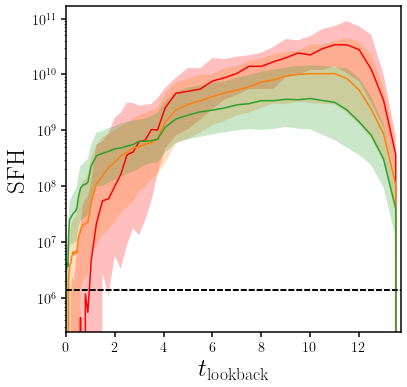

In [96]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red_tng, uv_lessred_tng, uv_lesserred_tng], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfh_t_tng[sample,:], [0.16, 0.50, 0.84], axis=0)

    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
    sub.axhline(1.4e6, color='k', linestyle='--')
sub.set_xlim(0, 13.7)
sub.set_yscale('log')
sub.set_ylabel('SFH', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

Text(0.5, 0, '$t_{\\rm lookback}$')

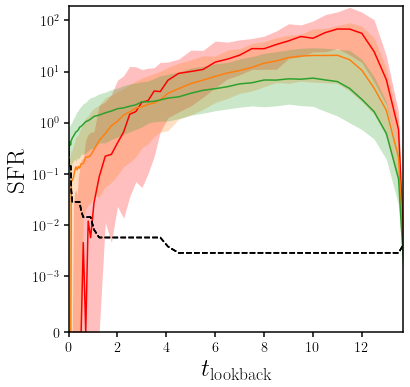

In [120]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red_tng, uv_lessred_tng, uv_lesserred_tng], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfr_t_tng[sample,:], [0.16, 0.50, 0.84], axis=0)

    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), 1.4e6/(t_sfh_high-t_sfh_low)/1e9, c='k', ls='--')
sub.set_xlim(0, 13.7)
sub.set_ylim(0, None)
sub.set_yscale('symlog', linthreshy=1e-3)
sub.set_ylabel('SFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

Text(0.5, 0, '$t_{\\rm lookback}$')

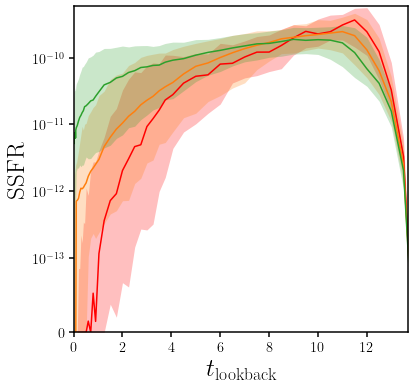

In [93]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red_tng, uv_lessred_tng, uv_lesserred_tng], ['r', 'C1', 'C2']):
    sfh_t_sample = np.quantile(sfr_t_tng[sample,:]/(10**sed_tng['logmstar'])[sample,None], [0.16, 0.50, 0.84], axis=0)

    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_ylim(0, None)
sub.set_yscale('symlog', linthreshy=1e-13)
sub.set_ylabel('SSFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

In [98]:
sed_eagle = dustInfer._read_sed('eagle') 


(-13.0, -9.0)

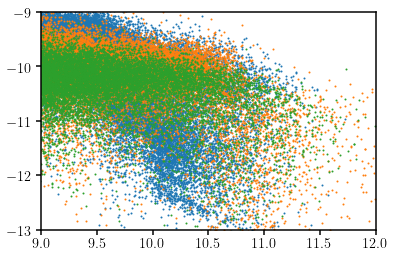

In [102]:
plt.scatter(sed_simba['logmstar'], sed_simba['logsfr.inst']-sed_simba['logmstar'], s=1)
plt.scatter(sed_tng['logmstar'], sed_tng['logsfr.inst']-sed_tng['logmstar'], s=1)
plt.scatter(sed_eagle['logmstar'], sed_eagle['logsfr.inst']-sed_eagle['logmstar'], s=1)
plt.xlim(9., 12.)
plt.ylim(-13, -9)

(-13.0, -8.0)

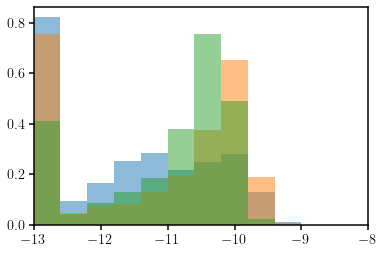

In [109]:
plt.hist(np.clip(sed_simba['logsfr.inst']-sed_simba['logmstar'], -13, None)[sed_simba['logmstar'] > 10.], range=(-13, -9), alpha=0.5, density=True)
plt.hist(np.clip(sed_tng['logsfr.inst']-sed_tng['logmstar'], -13, None)[sed_tng['logmstar'] > 10.], range=(-13, -9), alpha=0.5, density=True)
plt.hist(np.clip(sed_eagle['logsfr.inst']-sed_eagle['logmstar'], -13, None)[sed_eagle['logmstar'] > 10.], range=(-13, -9), alpha=0.5, density=True)
plt.xlim(-13, -8)

In [112]:
1.8e7/(t_sfh_high-t_sfh_low)/1e9

array([3.6       , 1.8       , 1.8       , 1.8       , 1.8       ,
       1.8       , 1.8       , 1.8       , 1.8       , 1.8       ,
       0.6       , 0.36      , 0.36      , 0.36      , 0.36      ,
       0.36      , 0.36      , 0.36      , 0.24      , 0.18      ,
       0.18      , 0.18      , 0.18      , 0.10285714, 0.072     ,
       0.072     , 0.072     , 0.072     , 0.072     , 0.072     ,
       0.072     , 0.072     , 0.072     , 0.072     , 0.072     ,
       0.048     , 0.036     , 0.036     , 0.036     , 0.036     ,
       0.036     , 0.036     , 0.036     , 0.036     , 0.036     ,
       0.036     , 0.036     , 0.036     , 0.036     , 0.036     ,
       0.036     , 0.036     , 0.036     , 0.036     , 0.036     ,
       0.072     ])

In [114]:
np.log10(1.8e7/0.5e9)

-1.4436974992327127